In [1]:
from sklearn.datasets._samples_generator import make_blobs   
import matplotlib.pyplot as plt
import numpy as np

***1. Perfectly  Linear Dataset***

In [2]:
# generating clustering dataset 
X,y = make_blobs( n_samples=50, 
                centers=2,     # number of centers to generate
                random_state=0, # Determines random number generation for dataset creation
                cluster_std=0.60 #standard deviation of the clusters
                )

In [3]:
import pandas as pd
df = pd.DataFrame(data=X)   # turning into a dataframe
df.head(10)

,0,1
0,1.412816,1.530335
1,1.813361,1.631131
2,1.432893,4.376792
3,1.872718,4.180692
4,2.095178,1.079147
5,2.738908,0.156768
6,3.185158,0.089008
7,2.061568,1.969186
8,2.038358,1.154663
9,-0.047492,5.474253


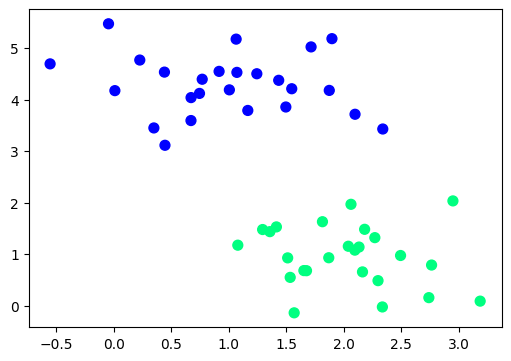

In [4]:
# plotting the cluster
fig = plt.figure(figsize= (5,3.5), constrained_layout  = True)
ax = fig.add_subplot()

ax.scatter( x= X[: , 0], y =X[:, 1], c=y, cmap='winter',s=50)

In [5]:
# training the model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C=1 )
svc.fit( X, y)

SVC(C=1, kernel='linear')

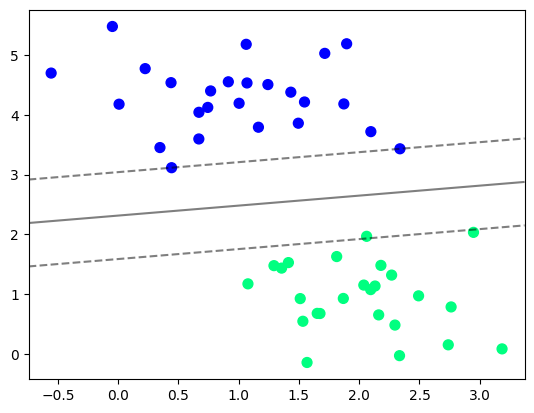

In [6]:
# creating the 2D graph(*) 
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # creating grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plotting decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plotting support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    #return plt.show()
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(svc)

> Support vectors can be seen in above example with +ve and -ve hyperplanes

> Even if we increase the number of sample points excpet support vector points, model will behave the same like hyperplanes won't shift. Thus they depend upon support vectors.

***2. Almost Linearly Separable Dataset***

In [7]:
# generating clustering dataset 
X,y = make_blobs( n_samples=100, 
                centers=2,     # number of centers to generate
                random_state=0, # Determines random number generation for dataset creation
                cluster_std=0.8 #standard deviation of the clusters
                )

In [8]:
df1 = pd.DataFrame(data=X)   # turning into a dataframe
df1.head(10)

,0,1
0,3.785856,1.966886
1,1.137293,0.547408
2,-0.025966,4.925780
3,0.266041,2.719150
4,3.005691,1.151218
5,1.348800,3.074792
6,1.012877,4.154040
7,3.593621,2.082075
8,0.666409,4.061945
9,1.412540,0.346024


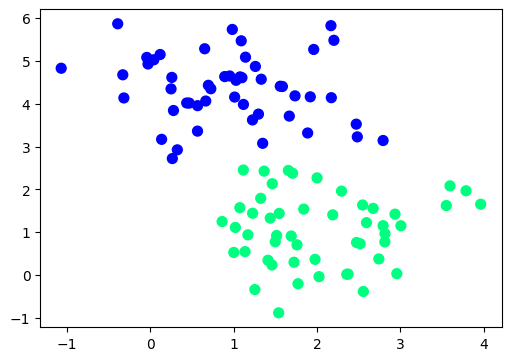

In [9]:
# plotting the cluster
fig = plt.figure(figsize= (5,3.5), constrained_layout  = True)
ax = fig.add_subplot()

ax.scatter( x= X[: , 0], y =X[:, 1], c=y, cmap='winter',s=50)

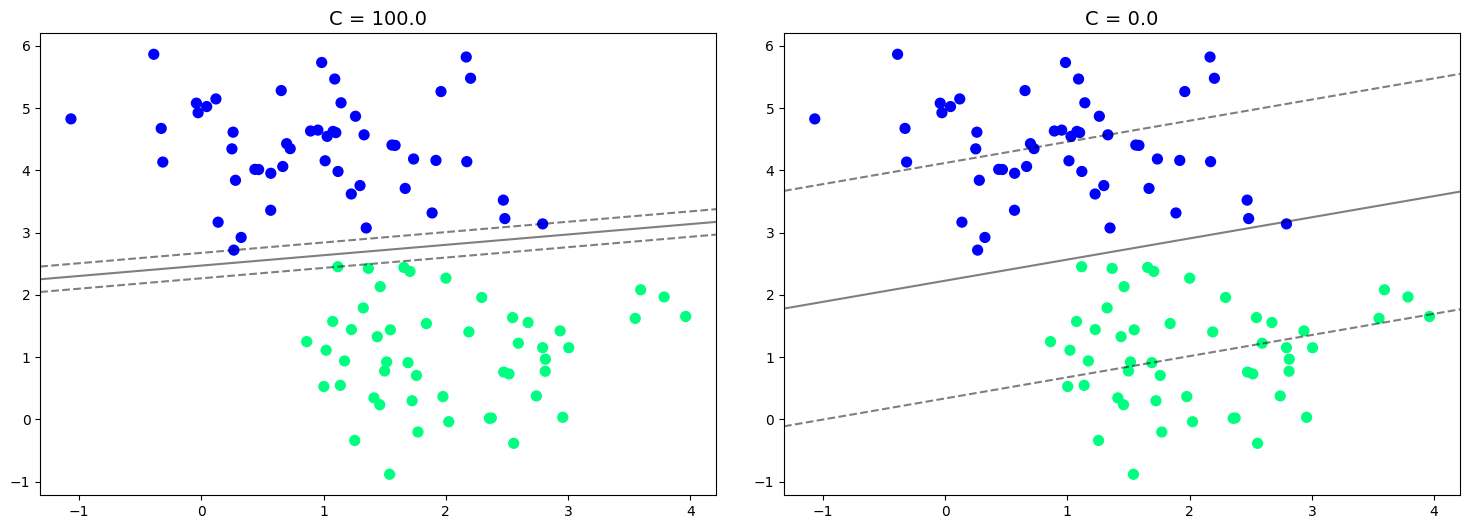

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):   # giving two values 100, 0.01 to C parameter. 
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(x = X[:, 0], y = X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

>With increasing C value, Gap is decresing and vectors are classsified properly.

> In the right figure, due to low C value, vectors are missclassfied with one blue vector is in -ve zone. 